**1. Exploratory Data Analysis (EDA)**

In [1]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
# Machine Learning - Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Saving and Loading Models
import joblib

print("All libraries imported successfully!")

All libraries imported successfully!


# 1.1. Distribusi Data

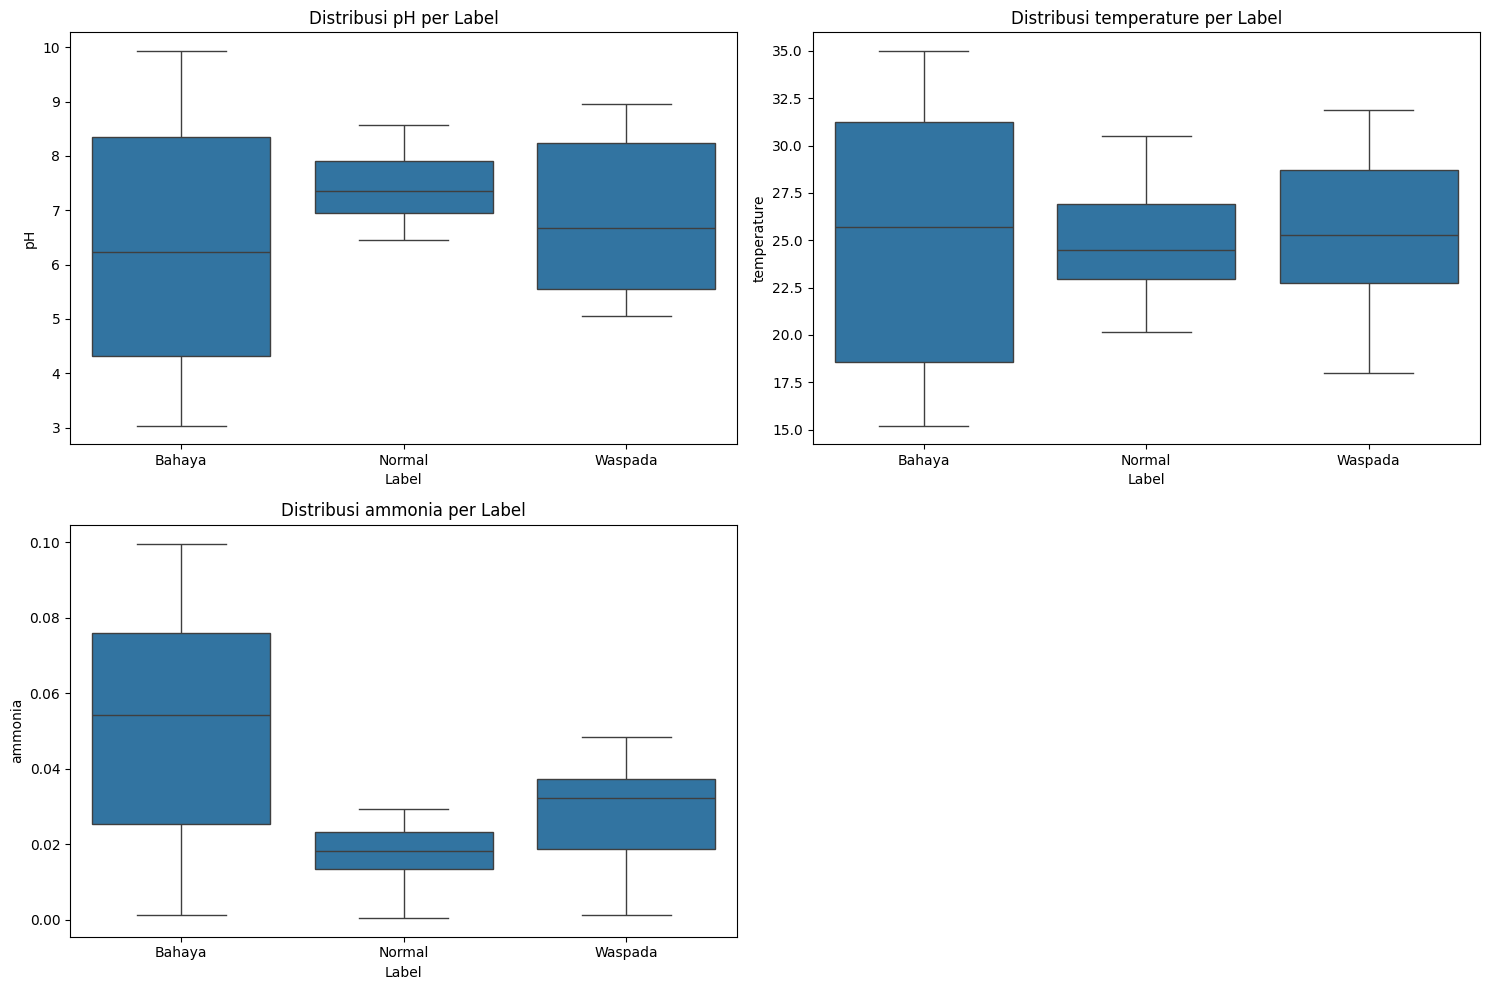

c:\Users\NITRO\Capstone Project\sistem_qualitas_air\deeplearning\training


In [2]:
# Load data
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv(r"C:\Users\NITRO\Python\deeplearning\data\processed\Data Sensor Tanpa Label_processed.csv")

# Plot distribusi setiap fitur per label
features = ['pH', 'temperature', 'ammonia']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Label', y=feature, data=df) # type: ignore
    plt.title(f'Distribusi {feature} per Label')
plt.tight_layout()
plt.show()
import os
print(os.getcwd())

# 1.2. Korelasi Antar Fitur

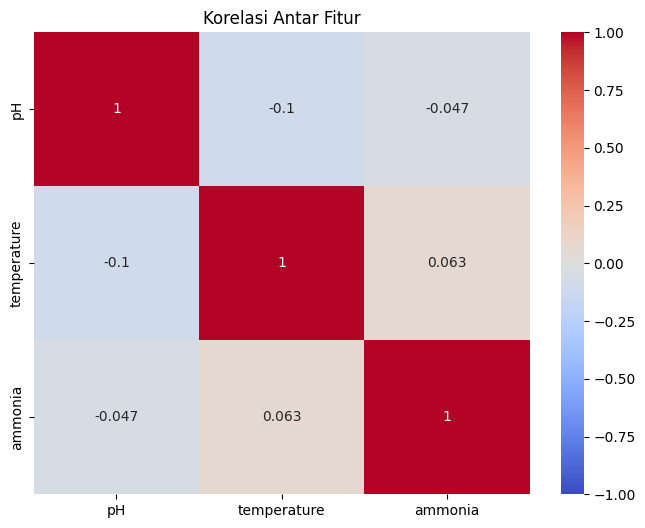

In [3]:
# Hitung korelasi
corr = df[['pH', 'temperature', 'ammonia']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1) # type: ignore
plt.title('Korelasi Antar Fitur')
plt.show()

**2. Eksperimen Awal dengan ANN**

# 2.1. Persiapan Data

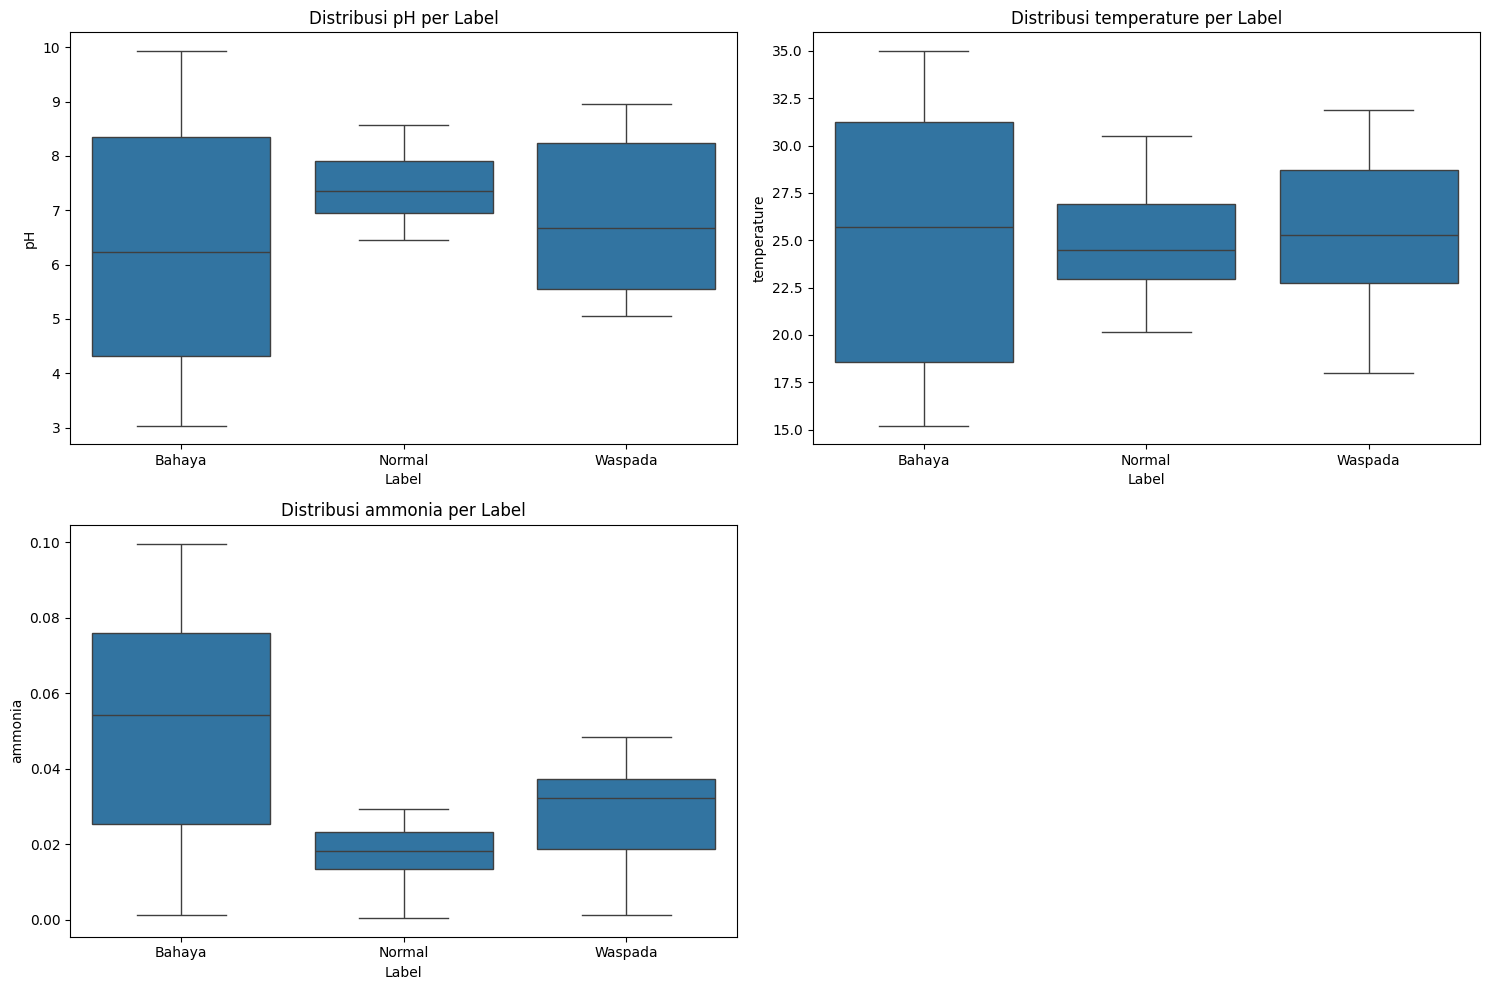

In [4]:
# Load data
import sys
from matplotlib import pyplot as plt
import pandas as pd


df = pd.read_csv(r"C:\Users\NITRO\Python\deeplearning\data\processed\Data Sensor Tanpa Label_processed.csv")

# Plot distribusi setiap fitur per label
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Label', y=feature, data=df) # type: ignore
    plt.title(f'Distribusi {feature} per Label')
    plt.xlabel('Label')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

# 2.2. Membangun Model ANN Percobaan

In [5]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
# Misal df sudah ada dan kolom label bernama 'Label'
X = df[['pH', 'temperature', 'ammonia']].values
y = df['Label'].values

# Label encoding dan one-hot encoding
label_encoder = LabelEncoder()  # type: ignore
y_encoded = label_encoder.fit_transform(y)
y_cat = to_categorical(y_encoded) # type: ignore

# Split data: train, val, test
X_train, X_temp, y_train, y_temp = train_test_split(X, y_cat, test_size=0.3, random_state=42, stratify=y_cat) # type: ignore
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp) # type: ignore

# Scaling fitur
scaler = StandardScaler() # type: ignore
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Pastikan model sudah didefinisikan di cell sebelumnya (cell 24)
# Jika ingin membuat model baru, gunakan:
# model = create_model()

# 2.3. Evaluasi Model

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential([
    Dense(16, activation='relu', input_shape=(3,)),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')  # 3 kelas: Normal, Waspada, Bahaya
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

c:\Users\NITRO\miniconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.1285 - loss: 1.2854 - val_accuracy: 0.1111 - val_loss: 1.1792
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2248 - loss: 1.1666 - val_accuracy: 0.4000 - val_loss: 1.0946
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3734 - loss: 1.1129 - val_accuracy: 0.7111 - val_loss: 1.0249
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5493 - loss: 1.0279 - val_accuracy: 0.7778 - val_loss: 0.9673
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6413 - loss: 0.9780 - val_accuracy: 0.8000 - val_loss: 0.9100
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7147 - loss: 0.9345 - val_accuracy: 0.8000 - val_loss: 0.8547
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7381 - loss: 0.8799 - val_accuracy: 0.8222 - val_loss: 0.7978
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7413 - loss: 0.8338 - val_accuracy: 0.8222 - val_lo

In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8146 - loss: 0.4526
Test Accuracy: 80.00%


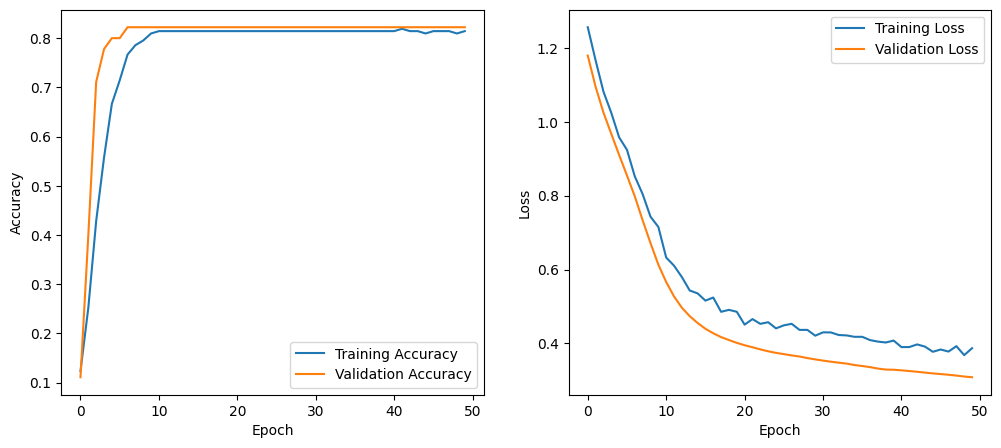

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8146 - loss: 0.4526
Test Accuracy: 80.00%


In [9]:
# Plot akurasi & loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluasi di test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

#  3. Rekomendasi untuk Model Final

In [10]:
%pip install tensorflow
from keras.layers import Dense
from keras.callbacks import EarlyStopping


Note: you may need to restart the kernel to use updated packages.


In [11]:
model_final = Sequential([
    Dense(16, activation='relu', input_shape=(3,)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

from keras.optimizers import Adam

model_final.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=10)

history_final = model_final.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)
model_final.save('model_ann.h5')

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4918 - loss: 1.0231 - val_accuracy: 0.7778 - val_loss: 0.9533
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7390 - loss: 0.9514 - val_accuracy: 0.8222 - val_loss: 0.8830
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8502 - loss: 0.8696 - val_accuracy: 0.8222 - val_loss: 0.8159
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7768 - loss: 0.8252 - val_accuracy: 0.8222 - val_loss: 0.7477
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7976 - loss: 0.7370 - val_accuracy: 0.8222 - val_loss: 0.6851
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8086 - loss: 0.6778 - val_accuracy: 0.8222 - val_loss: 0.6277
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8386 - loss: 0.5865 - val_accuracy: 0.8222 - val_loss: 0.5782
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7828 - loss: 0.5857 - val_accuracy: 0.8222 - 

**arsitektur jaringan saraf**

**Libary**

In [12]:

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Load data
df = pd.read_csv(r"C:\Users\NITRO\Python\deeplearning\data\processed\Data Sensor Tanpa Label_processed.csv")

In [14]:
# 2. Preprocessing Data
# Pisahkan fitur dan label
X = df[['pH', 'temperature', 'ammonia']]
y = pd.get_dummies(df['Label'])  # One-hot encoding

# Split data (60% train, 20% val, 20% test)
# Pertama split 60% train dan 40% sementara
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, 
    test_size=0.4, 
    random_state=42,
    stratify=df['Label']  # Stratified split
)

# Kemudian split 40% menjadi 20% val dan 20% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp.idxmax(axis=1)
)

# Verifikasi ukuran dataset
print(f"Train set: {len(X_train)} baris ({len(X_train)/len(X)*100:.1f}%)")
print(f"Validation set: {len(X_val)} baris ({len(X_val)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test)} baris ({len(X_test)/len(X)*100:.1f}%)")

# Normalisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Train set: 180 baris (60.0%)
Validation set: 60 baris (20.0%)
Test set: 60 baris (20.0%)


In [15]:
# 3. Define Model Architecture
def create_model(learning_rate=0.001, dropout_rate=0.2):
    model = Sequential([
        # Input layer
        Dense(16, activation='relu', input_shape=(3,)),
        Dropout(dropout_rate),
        
        # Hidden layer
        Dense(8, activation='relu'),
        Dropout(dropout_rate),
        
        # Output layer
        Dense(3, activation='softmax')
    ])
    
    optimizer = Adam(learning_rate=learning_rate)
    
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [16]:
# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
    ModelCheckpoint(
        'best_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max'
    )
]

# Training
history_final = model_final.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8787 - loss: 0.2722 - val_accuracy: 0.8500 - val_loss: 0.3464
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9147 - loss: 0.2265 - val_accuracy: 0.8500 - val_loss: 0.3448
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8898 - loss: 0.2898 - val_accuracy: 0.8500 - val_loss: 0.3450
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8948 - loss: 0.2697 - val_accuracy: 0.8500 - val_loss: 0.3462
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8958 - loss: 0.2449 - val_accuracy: 0.8500 - val_loss: 0.3466
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8656 - loss: 0.2658 - val_accuracy: 0.8500 - val_loss: 0.3466
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8656 - loss: 0.2764 - val_accuracy: 0.8500 - val_loss: 0.3467
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8672 - loss: 0.2674 - val_accuracy: 0.8500

In [17]:
# 5. Evaluate Model
# Load best model
from tensorflow import keras  # Add this import

best_model = keras.models.load_model('ann_model.h5')

# Evaluate on test set
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'ann_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

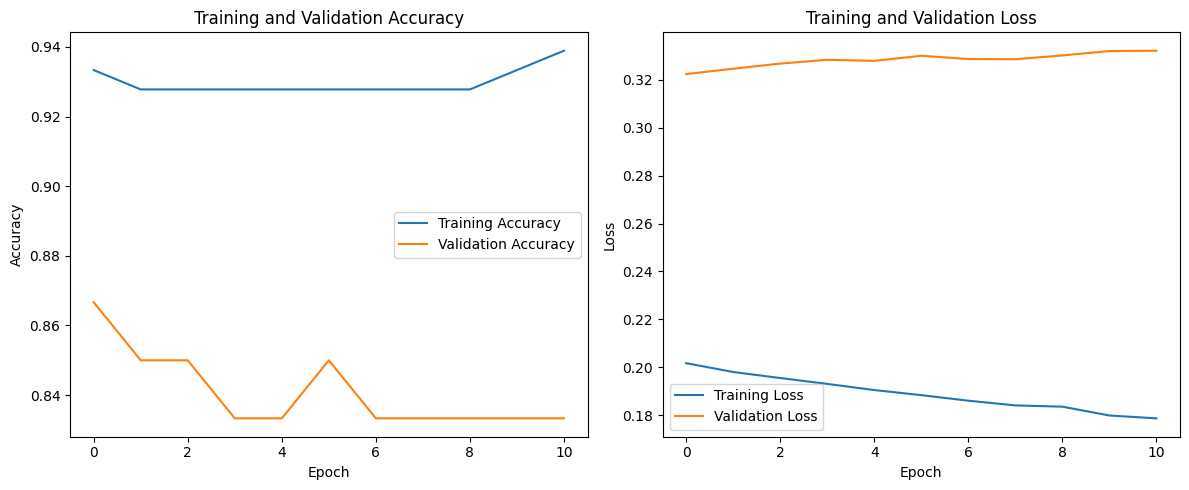

In [ ]:
# 6. Plot Training History
def plot_history(history):
    plt.figure(figsize=(12, 5))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_history(history_final)

In [ ]:
# 7. Save Final Model
model_final.save('ann_model.h5')
print("Model saved as ann_model.h5")

import joblib
joblib.dump(scaler, 'scaler_ann.pkl')
print("Scaler saved as scaler_ann.pkl")

Model saved as ann_model.h5
Scaler saved as scaler_ann.pkl


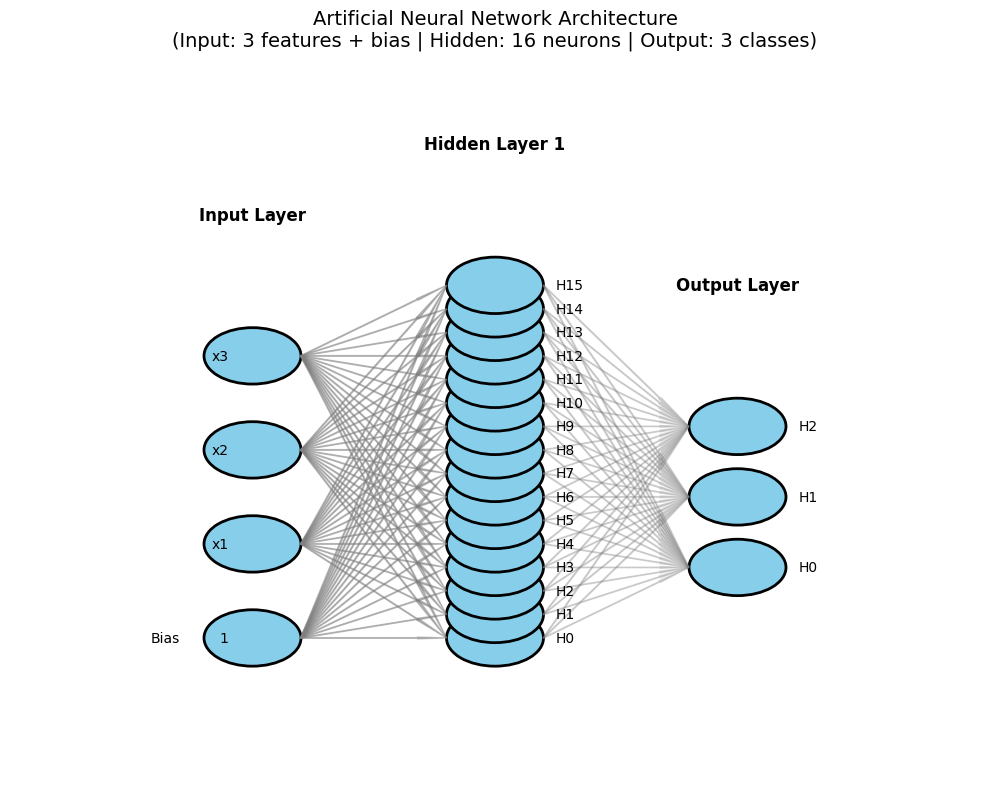

In [ ]:
from matplotlib.patches import Arrow

plt.figure(figsize=(10, 8))

# Layer positions
input_layer = 1
hidden_layer = 2
output_layer = 3
vertical_spacing = 1.5

# Neuron positions
def plot_layer(x_pos, y_positions, layer_name, is_input=False):
    for i, y in enumerate(y_positions):
        circle = plt.Circle((x_pos, y), 0.2, color='skyblue', ec='black', lw=2)
        plt.gca().add_patch(circle)
        
        # Add bias node for input layer
        if is_input and i == 0:
            plt.text(x_pos-0.3, y, 'Bias', ha='right', va='center', fontsize=10)
            plt.text(x_pos-0.1, y, '1', ha='right', va='center', fontsize=10)
        else:
            if is_input:
                plt.text(x_pos-0.1, y, f'x{i}', ha='right', va='center', fontsize=10)
            elif layer_name == 'Output':
                plt.text(x_pos+0.25, y, f'R{i}', ha='left', va='center', fontsize=10)
            else:
                plt.text(x_pos+0.25, y, f'H{i}', ha='left', va='center', fontsize=10)
    
    plt.text(x_pos, max(y_positions)+1, layer_name, 
             ha='center', va='center', fontsize=12, fontweight='bold')

# Input Layer (3 features + bias)
input_neurons = np.linspace(0, 2, 4)  # 4 nodes (bias + 3 features)
plot_layer(input_layer, input_neurons, 'Input Layer', is_input=True)

# Hidden Layer 1 (16 neurons)
hidden1_neurons = np.linspace(0, 2.5, 16)  # 16 nodes
plot_layer(hidden_layer, hidden1_neurons, 'Hidden Layer 1')

# Output Layer (3 neurons)
output_neurons = np.linspace(0.5, 1.5, 3)  # 3 nodes
plot_layer(output_layer, output_neurons, 'Output Layer')

# Connections
for i, y1 in enumerate(input_neurons):
    for y2 in hidden1_neurons:
        plt.gca().add_patch(Arrow(input_layer+0.2, y1, hidden_layer-input_layer-0.4, y2-y1, 
                                width=0.02, color='gray', alpha=0.5))

for i, y1 in enumerate(hidden1_neurons):
    for y2 in output_neurons:
        plt.gca().add_patch(Arrow(hidden_layer+0.2, y1, output_layer-hidden_layer-0.4, y2-y1, 
                                width=0.02, color='gray', alpha=0.3))

# Formatting
plt.xlim(0, output_layer+1)
plt.ylim(-1, max(hidden1_neurons)+1.5)
plt.axis('off')
plt.title('Artificial Neural Network Architecture\n(Input: 3 features + bias | Hidden: 16 neurons | Output: 3 classes)', 
          pad=20, fontsize=14)

plt.tight_layout()
plt.savefig('model_architecture.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import os
print(os.getcwd())

c:\Users\NITRO\Python\deeplearning\notebooks
